<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras==2.12.0
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.
Mounted at /content/drive


In [3]:
train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv")
test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv")
train = pd.DataFrame(train)
test = pd.DataFrame(test)

# distribuição das targets
print(train['target'].value_counts())
print(test['target'].value_counts())

target
legitimate    7000000
bruteforce    1400000
flood         1400000
slowite       1400000
dos           1400000
malformed     1400000
Name: count, dtype: int64
target
legitimate    3000000
dos            600000
slowite        600000
flood          600000
bruteforce     600000
malformed      600000
Name: count, dtype: int64


In [4]:
# balanceamento dos dados

# dados de treinamento
for i in train.index:
    if train['target'][i] != 'legitimate':
        train.at[i, 'target'] = 'malicious'

# dados de teste
for i in test.index:
    if test['target'][i] != 'legitimate':
        test.at[i, 'target'] = 'malicious'

# nova distribuição de dados
print(train['target'].value_counts())
print(test['target'].value_counts())

target
legitimate    7000000
malicious     7000000
Name: count, dtype: int64
target
malicious     3000000
legitimate    3000000
Name: count, dtype: int64


In [5]:
# pre processamento de dados
# separacao de features e targets

X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

In [6]:
# transformacao de features e targets categoricas em numeros inteiros

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# targets
label.fit(y_train)
label.fit(y_test)

label.classes_     # ordem das classes
print(y_train)
print(y_test)

0           legitimate
1            malicious
2            malicious
3            malicious
4            malicious
               ...    
13999995    legitimate
13999996     malicious
13999997     malicious
13999998    legitimate
13999999     malicious
Name: target, Length: 14000000, dtype: object
0           malicious
1          legitimate
2           malicious
3           malicious
4           malicious
              ...    
5999995     malicious
5999996    legitimate
5999997    legitimate
5999998     malicious
5999999    legitimate
Name: target, Length: 6000000, dtype: object


In [7]:
y_train = label.transform(y_train)
y_test = label.transform(y_test)
print(y_train)
print(y_test)

[0 1 1 ... 1 0 1]
[1 0 1 ... 0 1 0]


In [8]:
# features
X_train['tcp.flags'] = label.fit_transform(X_train['tcp.flags'])
X_train['mqtt.conack.flags'] = label.fit_transform(X_train['mqtt.conack.flags'])
X_train['mqtt.hdrflags'] = label.fit_transform(X_train['mqtt.hdrflags'])
X_train['mqtt.protoname'] = label.fit_transform(X_train['mqtt.protoname'])
X_train['mqtt.msg'] = label.fit_transform(X_train['mqtt.msg'])
X_train['mqtt.conflags'] = label.fit_transform(X_train['mqtt.conflags'])

X_test['tcp.flags'] = label.fit_transform(X_test['tcp.flags'])
X_test['mqtt.conack.flags'] = label.fit_transform(X_test['mqtt.conack.flags'])
X_test['mqtt.hdrflags'] = label.fit_transform(X_test['mqtt.hdrflags'])
X_test['mqtt.protoname'] = label.fit_transform(X_test['mqtt.protoname'])
X_test['mqtt.msg'] = label.fit_transform(X_test['mqtt.msg'])
X_test['mqtt.conflags'] = label.fit_transform(X_test['mqtt.conflags'])

In [9]:
# ajuste de dados
# columns_0 são as colunas com dados iguais a 0

columns_0 = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len']
X_train = X_train.drop(columns_0, axis=1)
X_test = X_test.drop(columns_0, axis=1)

print(X_train.shape)
print(X_test.shape)

(14000000, 20)
(6000000, 20)


In [10]:
X_train = X_train.values
X_test = X_test.values

print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
# treinamento de dados

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Accuracy train:  0.9603655714285714
Accuracy test:  0.9606431666666667 

Tabela de desempenho: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96   3000000
           1       0.98      0.94      0.96   3000000

    accuracy                           0.96   6000000
   macro avg       0.96      0.96      0.96   6000000
weighted avg       0.96      0.96      0.96   6000000
 

[[2954845   45155]
 [ 190986 2809014]] 



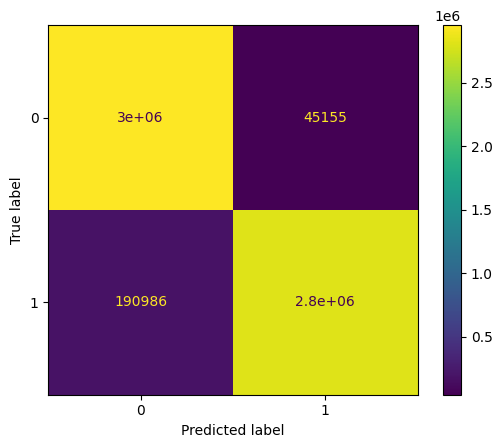

In [ ]:
# decision tree

tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
tree.fit(X_train, y_train)
print("Accuracy train: ", tree.score(X_train, y_train))
print("Accuracy test: ", tree.score(X_test, y_test), "\n")

# predição de valores
predict_tree = tree.predict(X_test)
print("Tabela de desempenho: ")
print(classification_report(y_test, predict_tree), "\n")

# confusion matrix
matrix_tree = confusion_matrix(y_test, predict_tree)
print(matrix_tree, "\n")
cm_tree = confusion_matrix(y_test, predict_tree, labels=tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree.classes_)
disp_tree.plot()
plt.show()

Accuracy train:  0.9603655714285714
Accuracy test:  0.9606433333333333 

Tabela de desempenho: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96   3000000
           1       0.98      0.94      0.96   3000000

    accuracy                           0.96   6000000
   macro avg       0.96      0.96      0.96   6000000
weighted avg       0.96      0.96      0.96   6000000
 

[[2954846   45154]
 [ 190986 2809014]] 



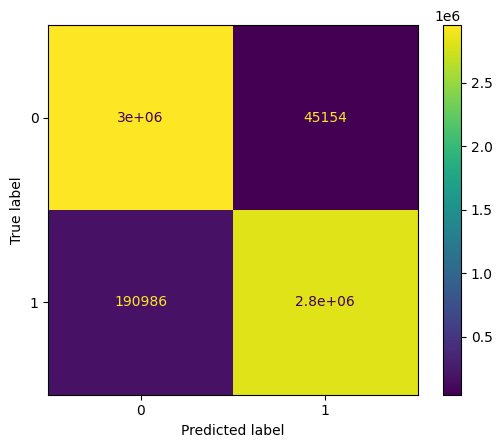

In [ ]:
# random forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Accuracy train: ", rf.score(X_train, y_train))
print("Accuracy test: ", rf.score(X_test, y_test), "\n")

# predição de valores
predict_rf = rf.predict(X_test)
print("Tabela de desempenho: ")
print(classification_report(y_test, predict_rf), "\n")

# confusion matrix
matrix_rf = confusion_matrix(y_test, predict_rf)
print(matrix_rf, "\n")
cm_rf = confusion_matrix(y_test, predict_rf, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot()
plt.show()

Accuracy train:  0.674632
Accuracy test:  0.6746976666666666 

Tabela de desempenho: 
              precision    recall  f1-score   support

           0       0.61      1.00      0.75   3000000
           1       1.00      0.35      0.52   3000000

    accuracy                           0.67   6000000
   macro avg       0.80      0.67      0.64   6000000
weighted avg       0.80      0.67      0.64   6000000
 

[[3000000       0]
 [1951814 1048186]] 



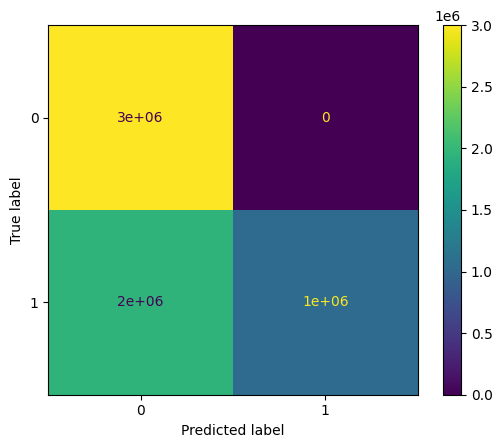

In [ ]:
# naive bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy train: ", nb.score(X_train, y_train))
print("Accuracy test: ", nb.score(X_test, y_test), "\n")

# predição de valores
predict_nb = nb.predict(X_test)
print("Tabela de desempenho: ")
print(classification_report(y_test, predict_nb), "\n")

# confusion matrix
matrix_nb = confusion_matrix(y_test, predict_nb)
print(matrix_nb, "\n")
cm_nb = confusion_matrix(y_test, predict_nb, labels=nb.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp_nb.plot()
plt.show()

Accuracy train:  0.9588790714285714
Accuracy test:  0.9589591666666667 

Tabela de desempenho: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96   3000000
           1       0.98      0.94      0.96   3000000

    accuracy                           0.96   6000000
   macro avg       0.96      0.96      0.96   6000000
weighted avg       0.96      0.96      0.96   6000000
 

[[2929343   70657]
 [ 175588 2824412]] 



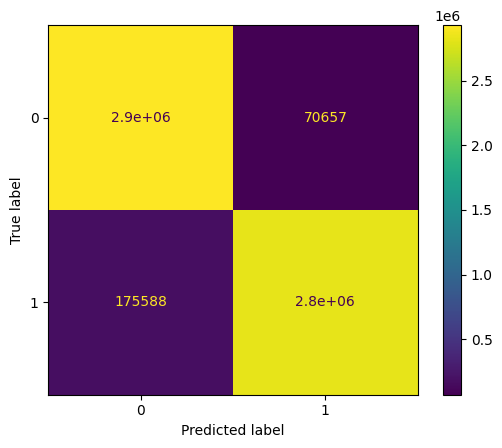

In [ ]:
# gradient boosting

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("Accuracy train: ", gb.score(X_train, y_train))
print("Accuracy test: ", gb.score(X_test, y_test), "\n")

# predição de valores
predict_gb = gb.predict(X_test)
print("Tabela de desempenho: ")
print(classification_report(y_test, predict_gb), "\n")

# confusion matrix
matrix_gb = confusion_matrix(y_test, predict_gb)
print(matrix_gb, "\n")
cm_gb = confusion_matrix(y_test, predict_gb, labels=gb.classes_)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb.classes_)
disp_gb.plot()
plt.show()

Accuracy train:  0.9203722142857143
Accuracy test:  0.9205236666666666 

Tabela de desempenho: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.92   3000000
           1       0.97      0.86      0.92   3000000

    accuracy                           0.92   6000000
   macro avg       0.93      0.92      0.92   6000000
weighted avg       0.93      0.92      0.92   6000000
 

[[2933272   66728]
 [ 410130 2589870]] 



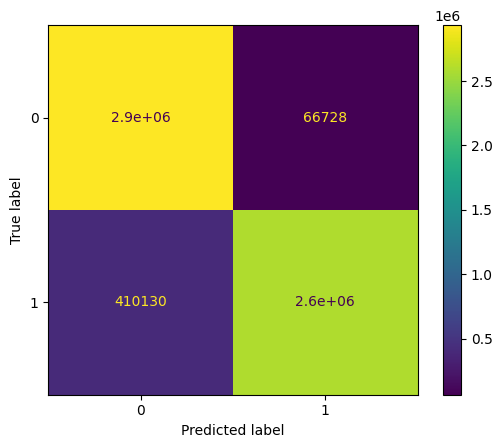

In [12]:
# multi-layer perceptron

mlp = MLPClassifier(solver='adam', shuffle=True, random_state=0, alpha=0.0000001)
mlp.fit(X_train, y_train)
print("Accuracy train: ", mlp.score(X_train, y_train))
print("Accuracy test: ", mlp.score(X_test, y_test), "\n")

# predição de valores
predict_mlp = mlp.predict(X_test)
print("Tabela de desempenho: ")
print(classification_report(y_test, predict_mlp), "\n")

# confusion matrix
matrix_mlp = confusion_matrix(y_test, predict_mlp)
print(matrix_mlp, "\n")
cm_mlp = confusion_matrix(y_test, predict_mlp, labels=mlp.classes_)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp.classes_)
disp_mlp.plot()
plt.show()

Epoch 1/200
14000/14000 - 44s - loss: 0.2534 - accuracy: 0.8485 - val_loss: 0.2260 - val_accuracy: 0.8575 - 44s/epoch - 3ms/step
Epoch 2/200
14000/14000 - 40s - loss: 0.2302 - accuracy: 0.8571 - val_loss: 0.2275 - val_accuracy: 0.8575 - 40s/epoch - 3ms/step
Epoch 3/200
14000/14000 - 41s - loss: 0.2270 - accuracy: 0.8583 - val_loss: 0.2236 - val_accuracy: 0.8594 - 41s/epoch - 3ms/step
Epoch 4/200
14000/14000 - 41s - loss: 0.2194 - accuracy: 0.8736 - val_loss: 0.2070 - val_accuracy: 0.8766 - 41s/epoch - 3ms/step
Epoch 5/200
14000/14000 - 40s - loss: 0.2031 - accuracy: 0.8898 - val_loss: 0.1901 - val_accuracy: 0.9080 - 40s/epoch - 3ms/step
Epoch 6/200
14000/14000 - 39s - loss: 0.1934 - accuracy: 0.9029 - val_loss: 0.2053 - val_accuracy: 0.8065 - 39s/epoch - 3ms/step
Epoch 7/200
14000/14000 - 40s - loss: 0.2351 - accuracy: 0.8967 - val_loss: 0.2480 - val_accuracy: 0.9102 - 40s/epoch - 3ms/step
Epoch 8/200
14000/14000 - 41s - loss: 0.2385 - accuracy: 0.8966 - val_loss: 0.2374 - val_accuracy

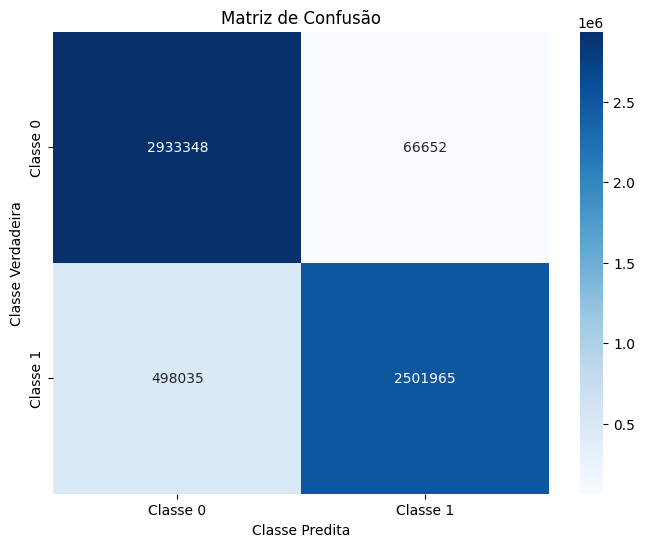

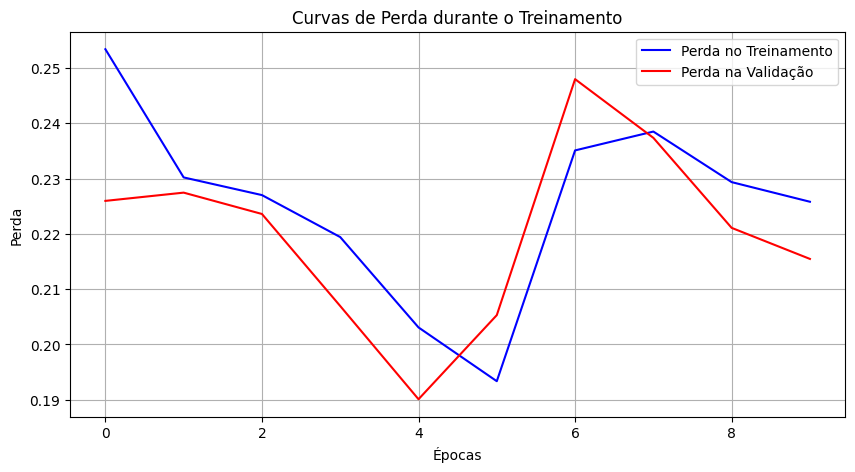

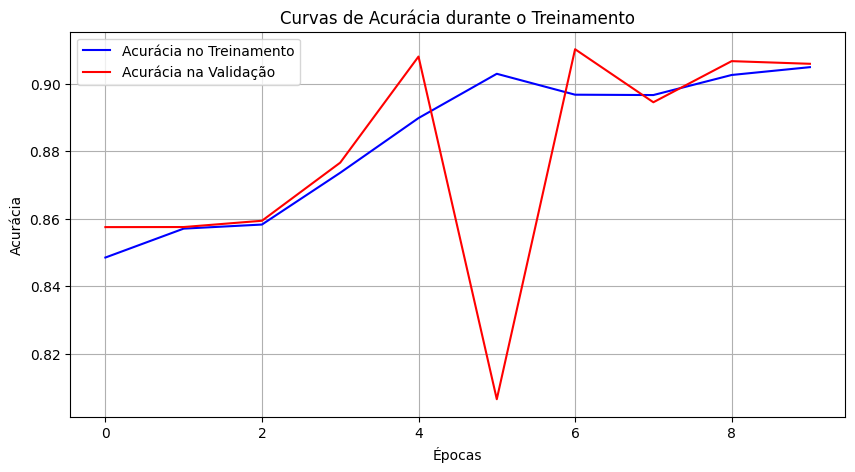

In [13]:
# sequential neural network

model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(30, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=200,batch_size=1000)

# matriz de confusão
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix, "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])],
            yticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

print("\n")

# valores de perda e acurácia durante o treinamento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# curvas de perda
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Perda no Treinamento', color='blue')
plt.plot(val_loss, label='Perda na Validação', color='red')
plt.title('Curvas de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()
print("\n")

# curvas de acurácia
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Acurácia no Treinamento', color='blue')
plt.plot(val_accuracy, label='Acurácia na Validação', color='red')
plt.title('Curvas de Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy, "\n")

print("Tabela de desempenho:")
print(classification_report(y_test, y_pred))

Acurácia: 0.9058855 

Tabela de desempenho:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91   3000000
           1       0.97      0.83      0.90   3000000

    accuracy                           0.91   6000000
   macro avg       0.91      0.91      0.91   6000000
weighted avg       0.91      0.91      0.91   6000000

